<a href="https://colab.research.google.com/github/hollyemblem/raschka-llm-from-scratch/blob/main/chapter4_interlude_on_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Interlude on Embeddings

This notebook acts as a recap on Chapter 2, to walk through the different components of embeddings. Pulling in the dummy GPT model, we start from there:

In [79]:
### Implementing a placeholder GPT class

import torch
import torch.nn as nn

class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        '''the embedding layer is essentially a lookup operation that retrieves rows from the embedding layer’s weight matrix via a token ID.'''

        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"]) ##THIS IS CREATING A LOOKUP TABLE of 50257 rows, and 1 column. We can actually loopthrough this.
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"]) ##This creates a lookup table for tokens in a sequence. So we've set a context of 3 and it has 1 column.
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        self.trf_blocks = nn.Sequential(               #1 Transformer block placeholder
            *[DummyTransformerBlock(cfg)               #1 Transformer block placeholder
              for _ in range(cfg["n_layers"])]         #1 Transformer block placeholder
        )                                              #1 Transformer block placeholder
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])     #2 Layer norm placeholder
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False #take an input of 768 and output 50257
        )

    def forward(self, in_idx):
        print(f'in_idx is: {in_idx}')
        batch_size, seq_len = in_idx.shape #batch size of 1 and the sequence length is 1 row 3 columns
        tok_embeds = self.tok_emb(in_idx) #here we lookup the tokens. for each batch item, for each token position, replace token id with embedding vector
        print(f'The embedding layer is: {tok_embeds}')
        print(f'The embedding layer shape is {tok_embeds.shape}')
        pos_embeds = self.pos_emb(
            torch.arange(seq_len, device=in_idx.device)
        )
        print(f'We are looking up the following sequence length {seq_len} in {self.pos_emb.weight}')
        x = tok_embeds + pos_embeds #we then sum the values.
        print(f'we then sum the values to get {x}')
        x = self.drop_emb(x)
        print(f'Drop out is applied, we can turn this off for now though {x}')
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        print(f'The out_head linear layer converts the vector handled within the transformer blocks to a matrix with num rows = embedding dimension size, and number of columns equalling the vocab size. \
        Essentially, we can use this to obtain one score per token to get logits for "which token is next?"')
        print(f'The logits: {logits}')
        return logits

class DummyTransformerBlock(nn.Module):    #3 placeholder class
    def __init__(self, cfg):
        super().__init__()

    def forward(self, x):     #4 placeholder forward pass
        '''
        forward method describes the data flow through the model: it computes token and positional embeddings for the input indices,
        applies dropout, processes the data through the transformer blocks, applies normalization, and finally produces logits with the linear output layer.
        '''
        return x

class DummyLayerNorm(nn.Module):           #5
    def __init__(self, normalized_shape, eps=1e-5):    #6 placeholder layernorm
        super().__init__()

    def forward(self, x):
        return x

In [80]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,     # Vocabulary size
    "context_length": 3,  # Context length
    "emb_dim": 1,          # Embedding dimension
    "n_heads": 1,           # Number of attention heads
    "n_layers": 1,          # Number of layers
    "drop_rate": 0.0,        # Dropout rate
    "qkv_bias": False        # Query-Key-Value bias
}

In [69]:
!pip install tiktoken

In [81]:
import tiktoken

tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Learn about try"

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[20238,   546,  1949]])


In [83]:
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)

in_idx is: tensor([[20238,   546,  1949]])
The embedding layer is: tensor([[[ 0.1435],
         [-0.4465],
         [-0.8087]]], grad_fn=<EmbeddingBackward0>)
The embedding layer shape is torch.Size([1, 3, 1])
We are looking up the following sequence length 3 in Parameter containing:
tensor([[ 0.8394],
        [ 0.5010],
        [-0.4924]], requires_grad=True)
we then sum the values to get tensor([[[ 0.9829],
         [ 0.0545],
         [-1.3011]]], grad_fn=<AddBackward0>)
Drop out is applied, we can turn this off for now though tensor([[[ 0.9829],
         [ 0.0545],
         [-1.3011]]], grad_fn=<AddBackward0>)
The out_head linear layer converts the vector handled within the transformer blocks to a matrix with num rows = embedding dimension size, and number of columns equalling the vocab size.         Essentially, we can use this to obtain one score per token to get logits for "which token is next?"
The logits: tensor([[[ 0.5180,  0.1172, -0.3045,  ...,  0.6059,  0.2019,  0.0293],
 

In [72]:
print(nn.Embedding(1,1).weight)

Parameter containing:
tensor([[-0.4863]], requires_grad=True)


In [73]:
nn.Embedding(GPT_CONFIG_124M["vocab_size"], GPT_CONFIG_124M["emb_dim"])

Embedding(50257, 1)

In [49]:
#for i, row in enumerate(nn.Embedding(GPT_CONFIG_124M["vocab_size"], GPT_CONFIG_124M["emb_dim"]).weight ):
    #print(i, row)

In [50]:
nn.Embedding(GPT_CONFIG_124M["context_length"], GPT_CONFIG_124M["emb_dim"]).weight

Parameter containing:
tensor([[-0.4412],
        [ 0.9227],
        [-0.0932]], requires_grad=True)

## Diagram of Core Process

We're missing the Transformer chunks, but up until Chapter 4.1 here os the architecture so far.


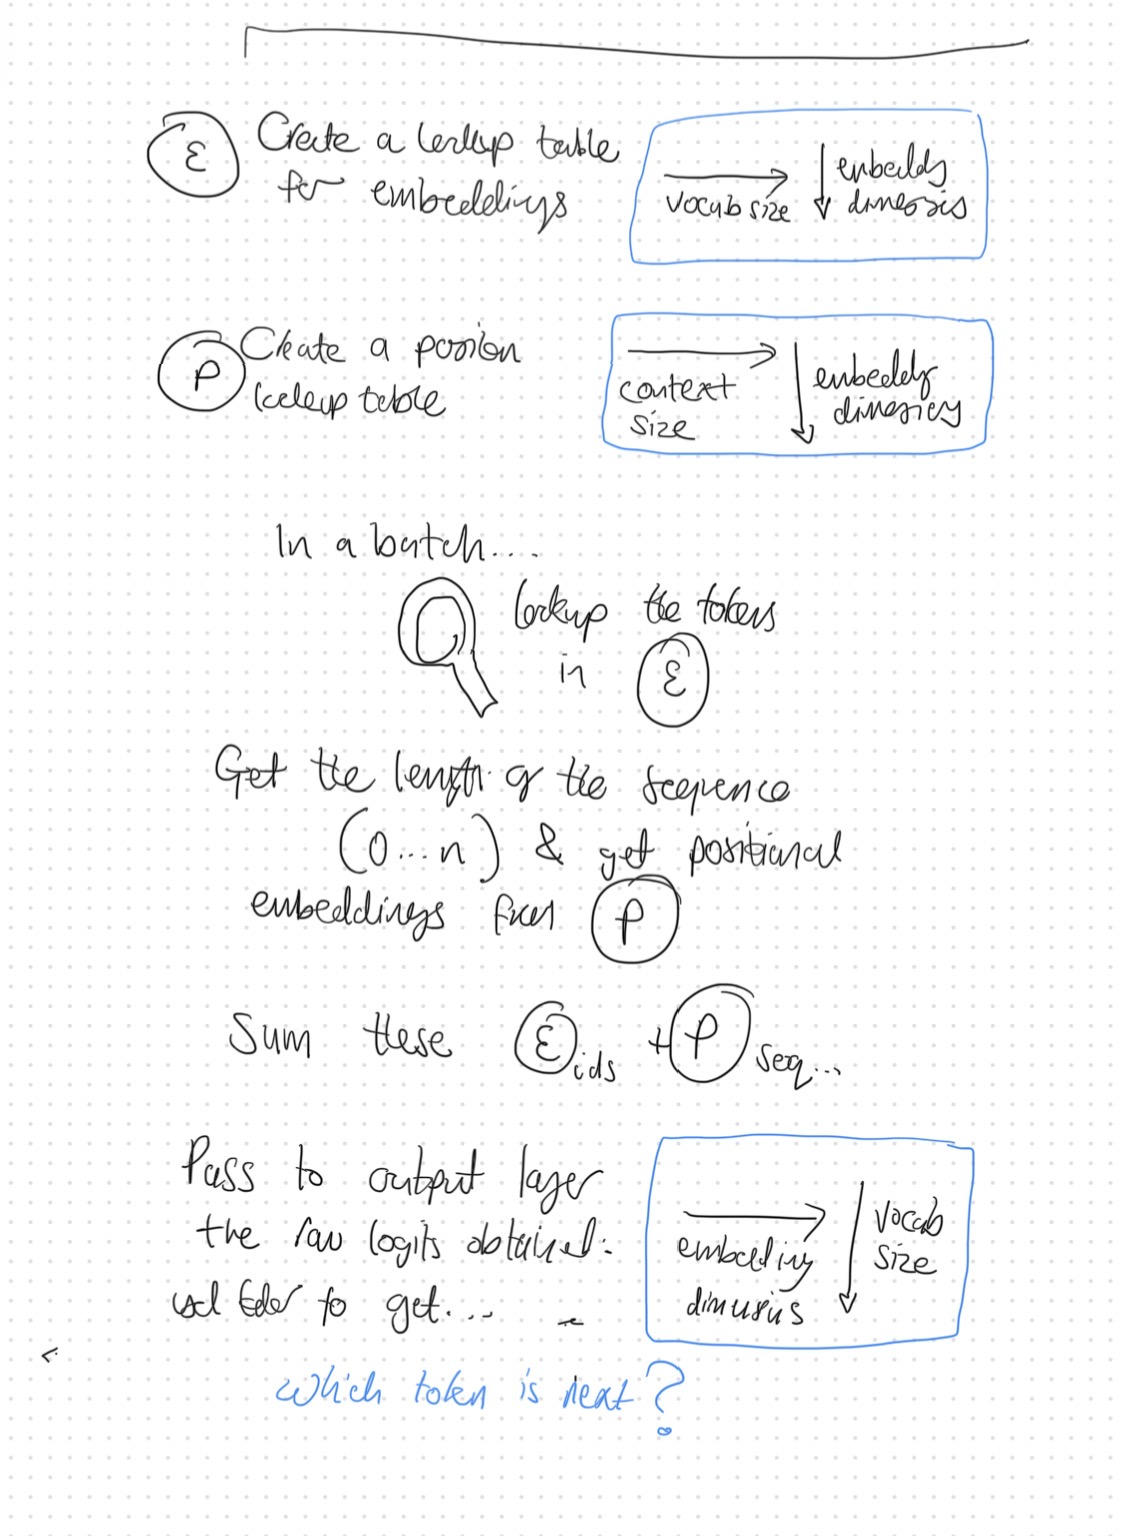

In [ ]:
Ther